<a href="https://colab.research.google.com/github/byungkim0068/ITC/blob/main/Copy_of_Errors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dr Oliviero Andreussi, olivieroandreuss@boisestate.edu

Boise State University, Department of Chemistry and Biochemistry

# Introduction to Errors, Probability, and Data Analysis

Before we start, let us import the main modules that we will need for this lecture. You will see some new modules in the list below, we will add more details in the right sections.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## A Stochastic Model of Experimental Errors

We will consider a simple model of an experimental measuring process. Let us assume that we are measuring a property $x$, whose exact value is $x_0$. However, our measure is subject to some small errors, that can randomly affect the measured result, either by adding or by subtracting a small amount $\epsilon$: each time we take a measure of $x$ we can think that we toss a fair coin and, if we get head, we add $\epsilon$ to the true value, otherwise we subtract $\epsilon$ from the true value. We can code this process using a random number between 0 and 1 as our coin toss, if the random number is lower than $p=0.5$ we consider it as getting a head on the coin toss.

In [5]:
# simulation setup
x0 = 1.
epsilon = 0.01
p_success = 0.5
#
# starting guess of our results
x = x0 # we will start assuming our measure is the exact value
#
# we start the stochastic process by picking a random number
cointoss = np.random.random() # no argument means we only need one random number
if cointoss < p_success :
    # our random number is less than 0.5, it's a head
    x = x + epsilon
else :
    # our random number is greater than 0.5, it's a tail
    x = x - epsilon
#
# report the result
print(x)

0.99


If we repeat the measuring process multiple times, $M$, what do you expect to be the distribution of results? Think about it before running the code below.

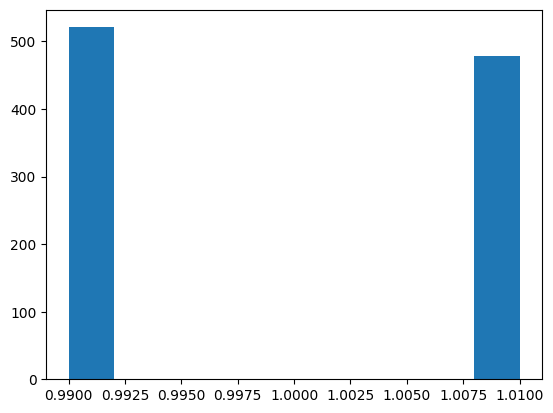

In [6]:
# simulation setup
x0 = 1.
epsilon = 0.01
p_success = 0.5
n_measures = 1000 # our name for M
#
# starting guess of our results
x = np.ones(n_measures) * x0
#
# stochastic process
for i in range(n_measures):
    cointoss=np.random.random() # no argument means we only need one random number
    if cointoss < p_success :
        # our random number is less than 0.5, it's a head
        x[i] = x[i] + epsilon
    else :
        # our random number is greater than 0.5, it's a tail
        x[i] = x[i] - epsilon
#
# report the results
plt.hist(x) # this function of matplotlib.pyplot is very useful to plot distributions
plt.show()

In the example above we only had one random source of errors. In general, when we perform an experimental measure we have a very large number, $N$, of sources of errors, each contributing a small random error to our measured quantity. We can extend our model above to consider multiple sources of errors as follows. For a sake of keeping the model simple, we will assume all sources of errors will have the same effect ($\epsilon$) on the measured quantity and they are not correlated.

In [7]:
# simulation setup
x0 = 1.
epsilon = 0.01
p_success = 0.5
n_sources = 3 # this is our name for N
#
# starting guess of our measure
x = x0
#
# stochastic process
cointosses=np.random.random(n_sources) # we draw multiple random numbers, one for each source of error
for cointoss in cointosses : # for each random number we check wether to add or subtract the error
    if cointoss < p_success :
        # our random number is less than 0.5, it's a head
        x = x + epsilon
    else :
        # our random number is greater than 0.5, it's a tail
        x = x - epsilon
#
# report the result
print(x)

1.01


 We can now repeat this process for multiple measuring attempts and collect the distribution of results.

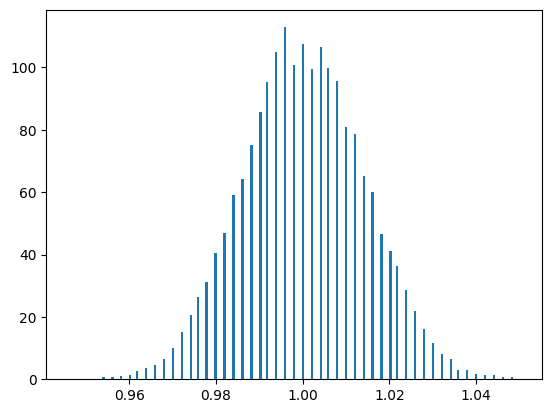

In [8]:
# simulation setup
x0=1.
epsilon=0.001
p_success = 0.5
n_sources = 200
n_measures = 10000
#
# starting guess of our measures
x = np.ones(n_measures) * x0
#
# stochastic model
for i in range(n_measures):
    cointosses=np.random.random(n_sources) # no argument means we only need one random number
    for cointoss in cointosses :
        if cointoss < p_success :
            # our random number is less than 0.5, it's a head
            x[i] = x[i] + epsilon
        else :
            # our random number is greater than 0.5, it's a tail
            x[i] = x[i] - epsilon
#
binomial,bins,_=plt.hist(x,bins=n_sources+1,density=True)
plt.show()

> CALLENGE 1: How does the measured quantity depend on the parameters of our stochastic model ($M$, $\epsilon$, $N$, $p$)? In particular, how does the **precision** of our measure depend on the parameters? How does the **accuracy** of our measure depend on the parameters?

The process described above is an example of a Bernoulli process, for which the number of successes in $N$ trials is given by the Binomial distribution. As $N$ becomes large, the Binomial distribution becomes indistingishable from a Gaussian (a.k.a. normal) distribution. For this reason, when looking at random uncorrelated measurement errors we can assume our measures are distributed according to a normal distribution. How are the parameters of a normal distribution connected to the ones of the Bernoulli process?

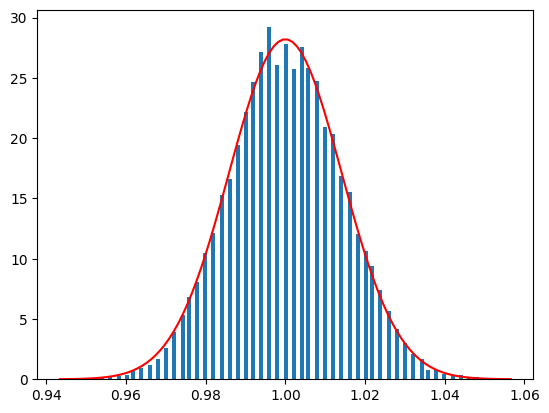

In [9]:
mu = x0 + n_sources*(2*p_success-1)*epsilon
sigma = np.sqrt(n_sources*p_success*(1-p_success)*4)*epsilon
xg = np.linspace(mu-4*sigma,mu+4*sigma,100)
gaussian = 1/np.sqrt(2*np.pi)/sigma*np.exp(-(xg-mu)**2/2/sigma**2)
plt.plot(xg,gaussian,'r')
plt.bar((bins[:-1]+bins[1:])/2,height=binomial*(bins[1]-bins[0])/2/epsilon,width=epsilon)
plt.show()

## Sampling Problem

Whenever we repeat our measurements, we get a better idea of the ideal distribution from which we are sampling. Cleaerly, in the limit of an infinite number of measurements, the distribution of our measures will look very similar to a Gaussian centered on the correct value. How can we use the sample of measurements to predict $x_0$? How good is our estimate and how does it depend on the number of measures? Statistics, and in particular the Central Limit Theorem, help answering these questions.

By looking at the results above, we realize that the best estimate of our true value is given by the center of the distribution of measured values. There are different ways to compute the center of a distribution of values, the most effective is the mean, $\bar{x}=\frac{1}{N}\sum x_i$. We can compute the mean using a simple for loop

In [10]:
mean=0.0
for value in x :
    mean = mean + value
mean = mean/n_measures
print(mean)

1.0002321999999966


Similarly, we can estimate the spread of our sample distribution in terms of its variance, $\sigma^2=\frac{1}{N-1}\sum (x_i-\bar{x})^2$, or its standard deviation, $\sigma$

>CHALLENGE 2: Write a for loop to compute the variance of the measurement results using the formula above

However, Numpy has some shortcuts to compute statistical properties (mean, standard deviation, variance, etc.) of values stored in a Numpy array:

In [11]:
print("The measurements have a mean of {:.5f}, a variance of {:.5f}, and a standard deviation of {:.5f}".format(x.mean(),x.var(ddof=1),x.std(ddof=1)))

The measurements have a mean of 1.00023, a variance of 0.00020, and a standard deviation of 0.01405


In the code above, we passed to the variance and standard deviation a quantity called `ddof`, which stands for delta degrees of freedom, and is the number that we subtract to the total number of measures in the denominator of the formula for the variance. In this case, we set it equal to one because we are computing the variance with respect to the mean, but the mean was computed on the sample, it is not an independent parameter. Since we used the data to compute the mean, we have one less degree of freedom to compute the variance. As an alternative definition, this number enforces the fact that we cannot compute a variance for a sample with only one measurement.

We have just seen that, given a sample of measurements, we can estimate properties of the distribution from which the measurements are sampled. How good are our estimates? In particular, we would like to quantify the accuracy of our estimate of the mean, since this is directly connected to the true value that we want to measure. The CLT states that the mean of a sample has a Gaussian distribution with a spread of $\sigma_{\bar{x}}=\frac{\sigma}{\sqrt{N}}$. This quantity is usually called the standard error of the mean and it is the quantity that you usually have to use to report errors and confidence intervals.

In [12]:
ci_95percent = 1.96
standard_error = x.std(ddof=1)/np.sqrt(n_measures)
print("Our estimate of X is {:.4f} units. The 95% confidence interval is \u00B1 {:.4f} units".format(x.mean(),standard_error*ci_95percent))

Our estimate of X is 1.0002 units. The 95% confidence interval is ± 0.0003 units


## Error Propagation

Numpy also allows to generate samples of arbitrary sizes from several probability distributions, including binomial, Poisson, and normal distributions. These functions are in the `random` submodule of Numpy and are a bit easier to use (but completely equivalent) than the stochastic simulation that we setup above. For example, we can generate a sample from a normal distribution centered on $\mu$ with spread $\sigma$ as follows:

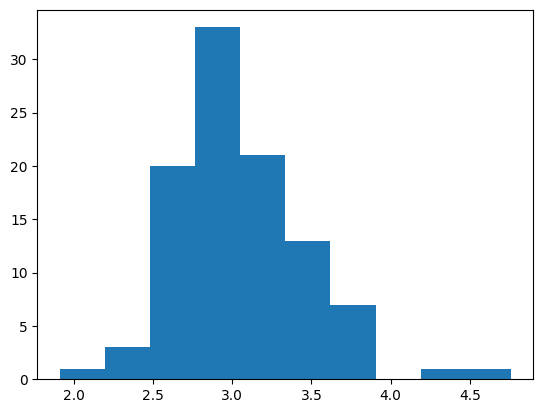

In [13]:
mu = 3.
sigma = 0.4
n_measures = 100
A = np.random.normal(mu,sigma,n_measures)
plt.hist(A)
plt.show()

We can double check that this sample comes from the correct distribution by estimating the parameters of the distribution using the `mean()` and `std()` functions on the data

In [14]:
print("The mean and spread of the distribution are {:.4f} and {:.4f}".format(mu,sigma))
print("The mean and spread of the data are {:.4f} and {:.4f}".format(A.mean(),A.std(ddof=1)))

The mean and spread of the distribution are 3.0000 and 0.4000
The mean and spread of the data are 3.0462 and 0.4162


We can use these samples to visualize what happens to our errors when we start doing operations with random variables (i.e. variables that have errors). The general formula that we want to use for error propagation applies to a generic function of multiple random variables, $y=f(A,B,...)$. Given the expression of $y$, and assuming that the random variables are uncorrelated, the error on the result is $\sigma_y^2 = \left|\frac{\partial f}{\partial A}\right|^2\sigma_A^2 + \left|\frac{\partial f}{\partial B}\right|^2\sigma_B^2 + ...$

For the simpler case of a function of a single random variable, $y=f(A)$, the result simplifies to $\sigma_y = \left|\frac{df}{dA}\right|\sigma_A$. We can check some examples below


In [15]:
n_measures=10000
mu_a = 3.
sigma_a = 0.4
A = np.random.normal(mu_a,sigma_a,n_measures)
funct = lambda x : x**2 # this is a fancy way of Python of defining a function of x in a single line
C = funct(A)
dfunct = lambda x : 2*x # for the error propagation we also need the derivative of the function wrt x

In [20]:
A

array([-0.87045628, -0.35943505, -0.30615677, ..., -0.07313191,
       -0.03879569, -0.52889131])

In [21]:
A**2

array([0.75769413, 0.12919356, 0.09373197, ..., 0.00534828, 0.00150511,
       0.27972602])

In [22]:
C

array([-0.09873062, -0.43958648, -0.50303968, ..., -0.04888074,
       -0.22279323, -0.33533575])

In [ ]:
error_propagation = dfunct(A.mean())*A.std(ddof=1)
print("The error on the result is {:0.3f}, while the propagation of error formula gives us {:.3f}".format(C.std(ddof=1),error_propagation))

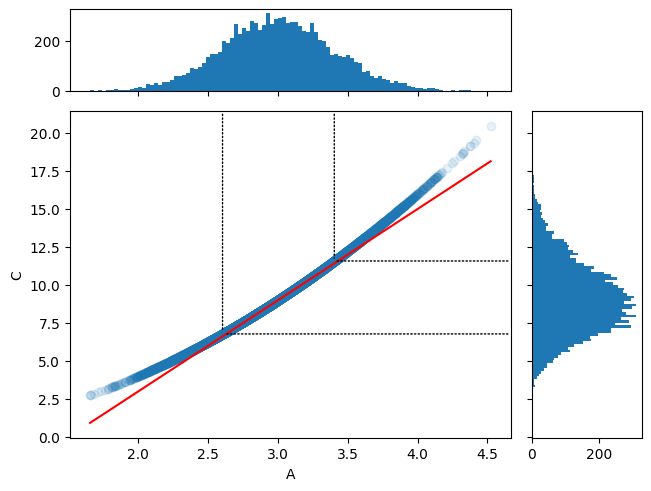

In [16]:
# Create a Figure, which doesn't have to be square.
fig = plt.figure(constrained_layout=True)
# Create the main axes, leaving 25% of the figure space at the top and on the
# right to position marginals.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
ax.scatter(A,C,alpha=0.1)
ax.set_xlabel('A')
ax.set_ylabel('C')

ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.hist(A,bins=100)

ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.hist(C, bins=100, orientation='horizontal')

x=np.linspace(A.min(),A.max(),100)
y=funct(A.mean())+dfunct(A.mean())*(x-A.mean())
ax.plot(x,y,'red')

ax.annotate("",
            xy=(A.mean()-A.std(), funct(A.mean()-A.std())), xycoords='data',
            xytext=(A.mean()-A.std(), ax.get_ylim()[1]), textcoords='data',
            arrowprops=dict(arrowstyle="-", linestyle=":")
            )
ax.annotate("",
            xy=(A.mean()+A.std(), funct(A.mean()+A.std())), xycoords='data',
            xytext=(A.mean()+A.std(), ax.get_ylim()[1]), textcoords='data',
            arrowprops=dict(arrowstyle="-", linestyle=":")
            )
ax.annotate("",
            xy=(A.mean()-A.std(), funct(A.mean()-A.std())), xycoords='data',
            xytext=(ax.get_xlim()[1], funct(A.mean()-A.std())), textcoords='data',
            arrowprops=dict(arrowstyle="-", linestyle=":")
            )
ax.annotate("",
            xy=(A.mean()+A.std(), funct(A.mean()+A.std())), xycoords='data',
            xytext=(ax.get_xlim()[1], funct(A.mean()+A.std())), textcoords='data',
            arrowprops=dict(arrowstyle="-", linestyle=":")
            )

plt.show()

What happens when we have multiple random variables? We can generate multiple samples with different centers and spreads and see how error propagation applies to this case.

In [17]:
n_measures = 10000
mu_a = 0.
sigma_a = 0.4
mu_b = 0.
sigma_b = 0.4
A = np.random.normal(mu_a,sigma_a,n_measures)
B = np.random.normal(mu_b,sigma_b,n_measures)
C = A + B

For the simple case of the sum of two random variables, doing the math on the general formula reported above shows that the variance of the result is the sum of the variances of the random variables, i.e. $\sigma_{A+B}^2 = \sigma_A^2 + \sigma_B^2$.

In [ ]:
error_propagation = np.sqrt(A.var(ddof=1) + B.var(ddof=1))
print("The error on the result is {:0.3f}, while the propagation of error formula gives us {:.3f}".format(C.std(ddof=1),error_propagation))

We can also see in the histograms that the spread of the sum is not twice as big the spread of the individual random variables.

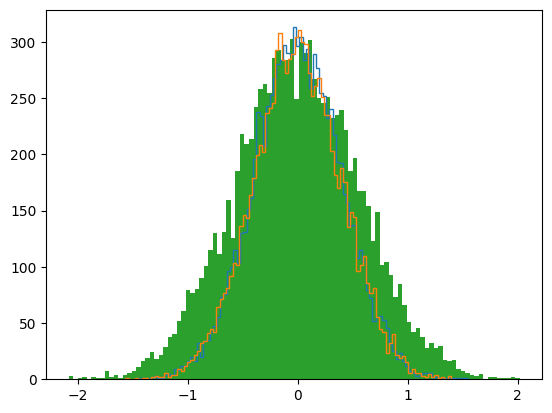

In [18]:
plt.hist(A,histtype='step',bins=100)
plt.hist(B,histtype='step',bins=100)
plt.hist(C,bins=100)
plt.show()

In fact, by generalizing this formula to the sum of $N$ random variables taken from the same distribution, we can easily get the expression of the standard error of the mean.

It is instructive to check what happens if instead of summing two different variables, we sum the same variable, $C=A+A$
> CHALLENGE 3: Is the result of the error propagation formula still correct? Why or why not?

## Reading Data from Files

### Reading CSV Files with Numpy

`Numpy` has some convenient functions to read data from simple text files. The standard files that we would use are called comma-separated values, a.k.a. csv files. If you open one of these files, you can see they contains rows of data, where each row has the same number of values (columns) separated by a comma. A typical csv file will look like the following:  

0.1, 0.0003, 0.5555,,,,<br/>
0.2, 0.0003, 0.6666,,,,<br/>
0.3, 0.0002, 0.7777,,,,<br/>
..., ..., ...,,,,<br/>

While many software tools and experimental devices will generate CSV files as output, you can also convert an Excel spreadsheet into a CSV file. Assuming you have a clean spreadsheet with just the data organized in columns, you can click on the Save As... option and select CSV as the file format.

We can use the `Numpy.loadtxt()` function to read a csv file and save the numbers in a multidimensional `Numpy` array. To test the commands of the following section, you should download the test.csv file from Canvas ([here](https://boisestatecanvas.instructure.com/courses/20544/files/10028926?wrap=1)) and save it in the Google Drive folder with your Colab notebook. You will need to mount the Google Drive so that it is accessible from the notebook, using the commands below. Note that you may have to change the path of the file depending on which folder of your Google Drive you copied it to. In the example below I assume you copied it in the same folder that Google Colab creates by default for the notebooks, called 'Colab Notebooks'.

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')
path='/content/gdrive/MyDrive/Colab Notebooks/' # you may need to change this if your file is in a different folder
file=path+'test.csv'

MessageError: ignored

In [ ]:
data=np.loadtxt(file,skiprows=1,delimiter=',')

By default, loadtxt() will try to read a csv file where the different columns of values are separated by a blank space. However, most csv files use a comma as delimiter, so we want to tell this explicitly to Python. Moreover, the file we are trying to read has some lables on the first row. For this reason we want to skip reading the first row. If we look at the data and check the shape of the data, we can see that we have 2433 rows and 5 columns.

In [ ]:
data.shape

We could load each column into a different array by specifying which column to read from the file, as follows:

In [ ]:
times = np.loadtxt(file,skiprows=1,delimiter=',',usecols=0) # only read the first column of data (index=0)
absorbance = np.loadtxt(file,skiprows=1,delimiter=',',usecols=1) # only read the second column of data (index=1)
plt.plot(times,absorbance)
plt.xlabel('Time (min)')
plt.ylabel('Absorbance (arbitrary units)')
plt.show()

### Reading Files with Pandas

While the Numpy function above does the job and it is more than enough in most circumstances, there is a very powerful alternative from a different module of Python, called `Pandas`. `Pandas` introduces a new type of object, a `DataFrame`, which is the Python equivalent of an Excel spreadsheet. `DataFrames` are just `Numpy` arrays with some additional indexing and labeling, which allow to do some operations very easily and quickly. First, we need to import the module as we have seen in the last lecture:

In [ ]:
import pandas as pd

We can now read a CSV file with the `read_csv()` function. Contrary to `Numpy` and the example above, `Pandas` is smart enough to understand most of the settings by itself.

In [ ]:
data = pd.read_csv(file)

We can now look at the content of the `DataFrame` using the `head()` method to look at the first few rows of the dataset, or using the `info()` method to look at a summary. Remember, since these are function specific to the `DataFrame` object, they need to be called from the object itself using the `.` notation.

In [ ]:
data.head()

In [ ]:
data.info()

`Pandas` also allows us to summarize the main statistics of all the columns of the data at once, using the `describe()` method:

In [ ]:
data.describe()

If we want to only use a specific column of the `DataFrame` we can select it using a square braket notation and the corresponding label. For example

In [ ]:
plt.plot(data['Time'],data['Absorbance'])
plt.xlabel('Time (min)')
plt.ylabel('Absorbance (arbitrary units)')
plt.show()

In a similar way, we can use indexing to select a subset of rows from a `DataFrame`. Alternatively, we can use conditional rules to only select certain rows of a `DataFrame`. A conditional rule will return an array of boolean results

In [ ]:
data['Time']>0.6

We can use these results as filter to only select the rows of the dataset that evaluate to True

In [ ]:
filtered_data = data[data['Time']>0.6]
filtered_data.head()

For more complicated conditions we can use the `query()` method, to which we can pass a string with the condition as argument:

In [ ]:
time_min = 0.6
time_max = 3.8
filtered_data=data.query('Time > {} and Time < {}'.format(time_min,time_max))
plt.semilogy(filtered_data['Time'],filtered_data['Absorbance'])
plt.xlabel('Time (min)')
plt.ylabel('Absorbance (arbitrary units)')
plt.show()

The additional advantage of `Pandas` is that it can also read directly Excel spreadsheets (but also tables from HTML documents and many more formats). You can check the different reading functions by typing pd.read_ and looking at the autocomplete options

In [ ]:
#pd.read_excel('test.xlsx')

As with `Numpy`, we can perform math operations on a column of a `DataFrame` directly, without the need to create a `for` loop. We can also save the result into a new column, that is added to the `DataFrame`.

In [ ]:
data['New']=np.log(data['Absorbance']) # we compute the log of the absorbance and store it in a new column called New
data.head()

> CHALLENGE 4: The data that we used clearly looks like an exponential decaying function. Can you guess the parameters of the exponential decay by looking at the plot? Try to plot your guess together with the data, adjust the parameters until you get a good fit.

## Linear Regression with Scikit-Learn

If two variables are linked by a relationship, we can try to use one to predict the other. There are several different ways we can try to find and characterize relationships between two variables. Some approaches are very flexible and don't make any assumption on the type of relation, while other approaches (called parametric) introduce some kind of analytical relation and use the available data to fit its parameters. The simplest relation between two variables is a linear model: $Y=aX+b$. In general, in regression model we distinguish between independent variable(s) ($X_1$, $X_2$, $X_3$, ..., sometimes called features) and dependent variable ($Y$, sometime called label). The distinction is generally motivated by practical reasons, usually an accurate measure of $Y$ is much more complicated than measuring $X$, which is why we use the latter to predict the former.

Given an analytical model, such as the linear relation above, the task of machine learning is to use the available data to fit the model, so that it can then be used to make predictions. These steps are exactly reflected in the strategy used by the machine-learning algorithms in the Scikit-Learn library, also known as `Sklearn`. In the following we will see how to use `Sklearn` to perform a linear regression. Since we only want to use that specific method, we only need to import the `LinearRegression` object from the module.  

In [ ]:
from sklearn.linear_model import LinearRegression

We now need to create an instance of a `LinearRegression` model. This step may seem useless or confusing, what we are doing is to setup a linear regression model and we are going to use the default settings for it. The object that we are creating will perform all the actions required to do a linear regression and it will store all the important quantities related to the model.

In [ ]:
linear_regression = LinearRegression() # note that we can use any name we like for the instance

In order to use our algorithm we need to choose the variables we want to use as features (independent) and the one we want to predict (label or dependent). In this example, we will try to fit the logarithmic decay of the absorbance as a function of time: our dependent variable is log(Absorbance), while our independent variable is Time.  

In [ ]:
label=np.log(filtered_data['Absorbance'].values) # the values attribute of the DataFrame extracts only the column values
features=filtered_data['Time'].values.reshape(-1,1) # we need to reshape because machine-learning algorithms are used to multidimensional features

#### Some Technical Details

In the commands above we had to be a bit more explicit with the format of our data. Here are some technical details, you probably will not need to know them, but it does not hurt to have them as a reference. `Sklearn` expects that data to process to be in the form of numpy arrays. We can exctract a numpy array with the values of the columns of a `DataFrame` by specifying that we only want the `.values` of the selected column: we are basically telling `Pandas` that we do not need all the other information (the label of the column, the index of each row, etc.). If our data is already in the form of numpy arrays, we do NOT need to do anything with them, they can be used right away from `Sklearn`.

However, most machine-learning algorithms will expect to have multiple features, i.e. multiple independent variables to predict a dependent variable. This corresponds to a numpy array that looks like a matrix, with one row for each datapoint, and one column for each feature. In this example we only want to use one independet variable, but we still need to pass this variable as if it was a matrix object (it is just a special matrix with just one column). In order to do that we need to use the `.reshape(-1,1)` function. We can see the difference by looking at the shape of the two objects. NOTE: if we started from a group of multiple variables we would not have needed to reshape it.

In [ ]:
print("The shape of the feature before reshaping is {}, while after the reshaping is {}".format(filtered_data['Time'].values.shape,features.shape))

#### Fit, Predict, and Score

We can now use our features and label to fit our linear model, i.e. to compute the parameters (slope and intercept) that enter in the equation reported above.

In [ ]:
linear_regression.fit(features,label)

Once the model has been fit, you can see that it contains a few new attributes, which also include to the computed parameters

In [ ]:
#dir(linear_regression)

In [ ]:
print("The fitted linear model has an intercept of {:.4f} and a slope of {:.4f}".format(linear_regression.coef_[0],linear_regression.intercept_))

Note that the slope is in fact an array of slopes (in this case with just one entry), as it is usually associated with multiple independent variables.

In [ ]:
linear_regression.coef_

> CHALLENGE 5: Plot the data together with the best (in the least squares sense) fit. The fit will probably NOT look very good, why? Can you do better with linear regression?

The linear regression algorithm can be used to make predictions on new datapoints, i.e. if we pass a new value for the feature the algorithm can tell us the corresponding label. For example, we could try to see what happens for very long times.

In [ ]:
new_times=np.linspace(3.6,6.0,100).reshape(-1,1)
predicted_log_absorbance=linear_regression.predict(new_times)
plt.plot(new_times,predicted_log_absorbance)
plt.show()

To check how well the fit works, we can use the linear regression object to compute a score. While scores should be used with a grain of salt, they can provide some qualitative description of good vs. bad fits. In the linear regression algorithm the typical score is the coefficient of determination, a.k.a. $R^2$. This coefficient describes how much of the variation in the dependent variable is actually explained by the variation in the independent variable(s). For good fits the coefficient gets close to 1, while poor fits have coefficients close to 0.

In [ ]:
help(linear_regression.score)

In [ ]:
print("The R2 coefficient of the linear fit is {:.4f}".format(linear_regression.score(features,label)))